<a href="https://colab.research.google.com/github/jadamcneill/music-computing/blob/main/assignments/labAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [20]:
def plotAudio2(sig,sampleRate,title):


   # this version expects the audio file to have already been opened by librosa


   # Adjust the x-axis to represent time
   time=np.arange(0,sig.shape[0])/sampleRate


   # Scale the y-axis to represent amplitude from -1 to 1
   excursion=max(abs(sig))
   sigNew = sig / excursion


   # Label the x and y axes with variables
   xlabel = 'Time (seconds)'
   ylabel = 'Amplitude'


   #plot the signal using the x and y axis variables
   plt.plot(time,sigNew)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.title(title)
   plt.show()


In [23]:
def plotAudioFreqDomain(sig,sr,title,winSize,specType):


  # create a normalized spectrogram
  # this includes several function calls
  # first create a basic specgrogram with librosa.stft() with the default window size (2048)
  # then make all of values in the spectrogram positive with np.abs()
  # then scale the spectogram to be in decibels, so it better reflects how we hear librosa.amplitude_to_db()
  spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)


  # display the normalized spectrogram with a log frequency scale
  librosa.display.specshow(spec, y_axis=specType)
  plt.colorbar(format='%+2.0f dB')

  plt.show()


In [11]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

   # from additiveSynthesis.ipynb


    # generate list of harmonics
    harmonics = np.arange(1,numHarmonics+1,seqHarm)

    # create a time series from 0 to 1 the inputted length
    timeSeries = np.linspace(0, 1, samplingRate)

    # create a cosine wave for the fundamental
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent

    # scale the signal to between -1 and 1
    excursion=max(abs(signal))
    signal = signal / excursion

    # plot signal
    plt.plot(timeSeries,signal)
    plt.xlabel('Time (Sec)')
    plt.ylabel('Amplitude')
    plt.title('Additive Synthesis')
    plt.plot

    return signal


In [14]:
def makeWaveforms(frequency,samplingRate,numHarmonics,waveType):
    # use an if/elif/else statement to set up the parameters for
    # the different type of waveforms based on the code in
    # additiveSynthesis.ipynb
    # if, elif (else if) and else can be used to evaluate the contents of a variable




  # if, elif (else if) and else can be used to evaluate the contents of a variable
  if waveType == 'sawtooth':
      seqHarm = 1
      ampExponent = 1
  elif waveType == 'square':
      seqHarm = 2
      ampExponent = 1
  elif waveType == 'triangle':
      seqHarm = 2
      ampExponent = 2
  else:
      numHarmonics = 1
      seqHarm = 1
      ampExponent = 1

  signal = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)

  # play signal
  IPython.display.Audio(data=signal, rate=samplingRate)

  return signal






In [17]:
def visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType):
  # call makeWaveform()

  signal = makeWaveforms(frequency,samplingRate,numHarmonics,waveType)

  # test whether makeWaveforms() runs without error before you try plotting anything

  # call plotAudio2()
  plotAudio2(signal,samplingRate, waveType)

  # call plotAudioFreqDomain()
  plotAudioFreqDomain(signal,samplingRate,waveType,winSize,specType)

  # return the output of makeWaveform()
  return signal

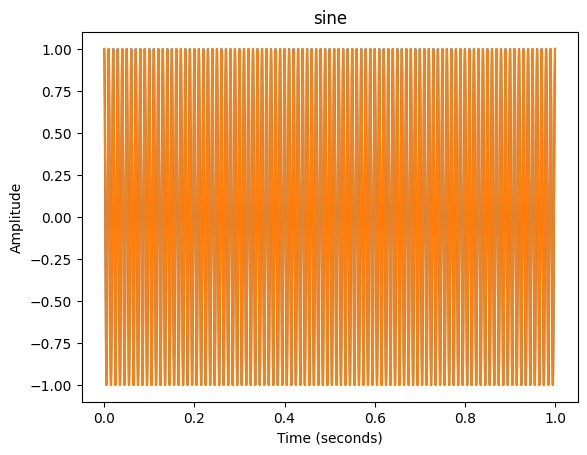

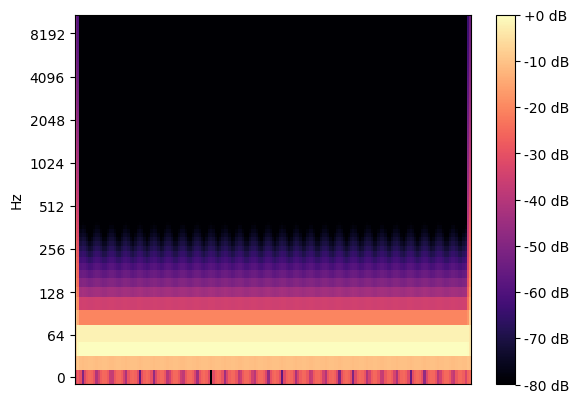

In [24]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'




# IPython.display.Audio() with the signal returned from visualizeWaveforms()

#visualizeWaveforms()
signal=visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType)
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)
# Assuming visualizeWaveforms() is defined and returns an audio signal
# Replace with the actual function call
# audio_signal = visualizeWaveforms()
# IPython.display.Audio(audio_signal)
#IPython.display.Audio()

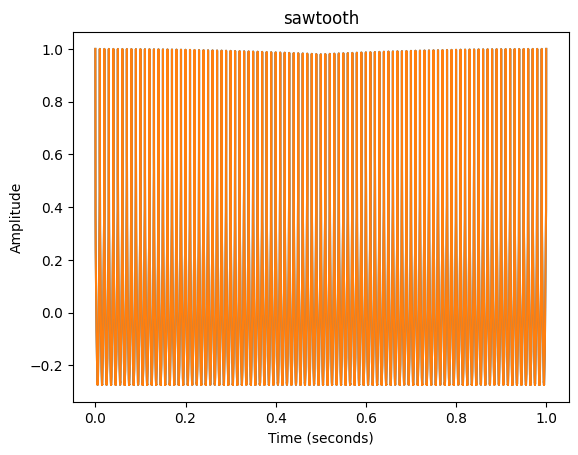

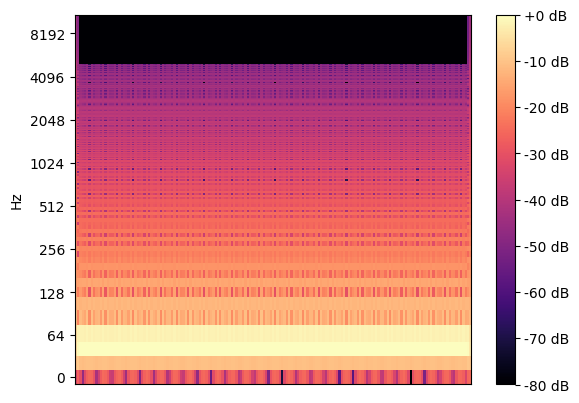

In [26]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'



#visualizeWaveforms()
signal=visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType)
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)


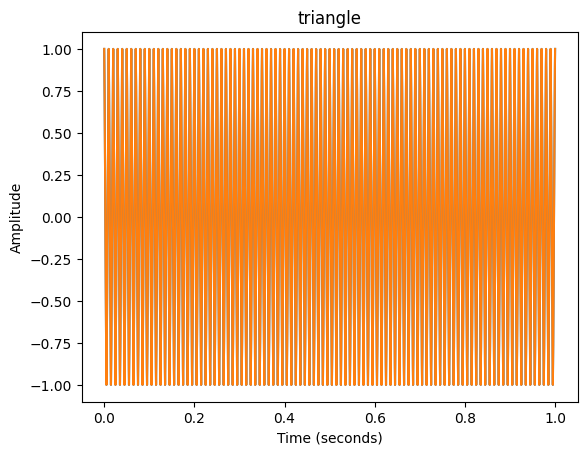

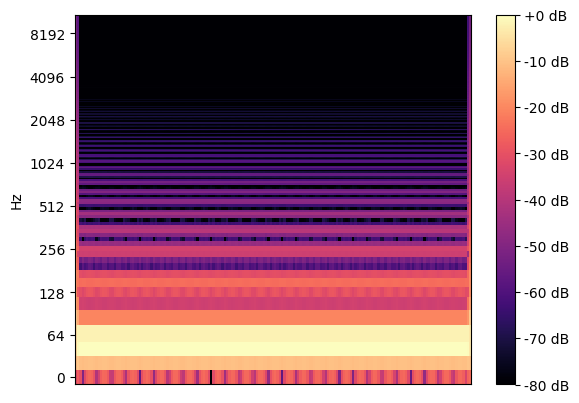

In [27]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'triangle'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal=visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType)
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)




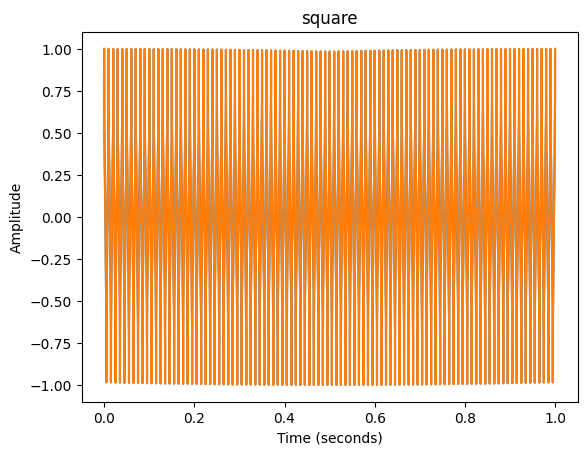

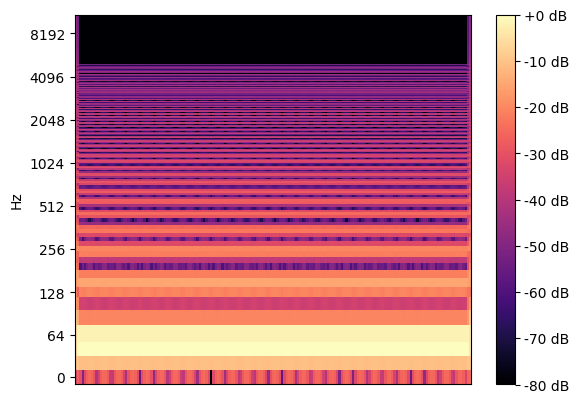

In [28]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'square'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal=visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType, winSize, specType)
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)



